Import Libraries

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12,6)


Load Dataset

In [3]:
# ===============================
# 2. Load Data
# ===============================

artists = pd.read_csv('/content/artists.csv')
tracks = pd.read_csv('/content/tracks.csv')

print("Artists Shape:", artists.shape)
print("Tracks Shape:", tracks.shape)




Artists Shape: (1104349, 5)
Tracks Shape: (475342, 20)


Data Cleaning & Preprocessing

In [4]:


# Check missing values
print(tracks.isnull().sum())

# Drop duplicates
tracks.drop_duplicates(inplace=True)

# Handle missing values
tracks.fillna({
    'popularity': tracks['popularity'].median(),
    'danceability': tracks['danceability'].median(),
    'energy': tracks['energy'].median(),
    'tempo': tracks['tempo'].median(),
    'acousticness': tracks['acousticness'].median(),
    'loudness': tracks['loudness'].median(),
    'valence': tracks['valence'].median()
}, inplace=True)

# Convert duration from ms to minutes
tracks['duration_min'] = tracks['duration_ms'] / 60000

# Convert release_date to datetime
tracks['release_date'] = pd.to_datetime(tracks['release_date'], errors='coerce')
tracks['release_year'] = tracks['release_date'].dt.year

tracks.head()


id                  0
name                1
popularity          0
duration_ms         0
explicit            0
artists             0
id_artists          0
release_date        0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      1
dtype: int64


,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_min,release_year
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,...,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3.0,2.115050,1922.0
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,...,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1.0,1.636667,1922.0
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,...,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5.0,3.027333,1922.0
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,...,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3.0,2.948450,1922.0
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],NaT,0.402,0.1580,...,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4.0,2.718000,NaN


Feature Engineering

In [5]:
# ===============================
# 4. Feature Engineering
# ===============================

# Popularity Category
tracks['popularity_category'] = pd.cut(
    tracks['popularity'],
    bins=[0, 40, 70, 100],
    labels=['Low', 'Medium', 'High']
)

# Normalize selected features
scaler = MinMaxScaler()
features_to_scale = ['danceability', 'energy', 'acousticness', 'valence']
tracks[features_to_scale] = scaler.fit_transform(tracks[features_to_scale])

tracks.head()


,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_min,release_year,popularity_category
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.650858,0.4450,...,0.4510,0.676707,0.7440,0.151,0.127,104.851,3.0,2.115050,1922.0,Low
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.701312,0.2630,...,0.9570,0.800201,0.0000,0.148,0.655,102.009,1.0,1.636667,1922.0,NaN
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.437941,0.1770,...,0.0512,0.997992,0.0218,0.212,0.457,130.418,5.0,3.027333,1922.0,NaN
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.323915,0.0946,...,0.0504,0.998996,0.9180,0.104,0.397,169.980,3.0,2.948450,1922.0,NaN
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],NaT,0.405651,0.1580,...,0.0390,0.992972,0.1300,0.311,0.196,103.220,4.0,2.718000,NaN,NaN


EXPLORATORY DATA ANALYSIS (EDA)

In [6]:
tracks.describe()


,popularity,duration_ms,explicit,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_min,release_year
count,475342.000000,4.753420e+05,475342.000000,359163,475342.000000,475342.000000,475342.000000,475342.000000,475342.000000,475342.000000,475342.000000,475342.000000,475342.000000,475342.000000,475342.000000,475341.000000,475342.000000,359163.000000
mean,28.122152,2.301761e+05,0.046049,1993-01-20 06:06:19.422156672,0.567508,0.537926,5.225293,-10.259627,0.657230,0.092900,0.450644,0.117900,0.210353,0.548764,118.771596,3.880025,3.836269,1992.663289
min,0.000000,3.344000e+03,0.000000,1922-01-06 00:00:00,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.055733,1922.000000
25%,13.000000,1.754152e+05,0.000000,1980-01-01 00:00:00,0.455096,0.339000,2.000000,-12.912000,0.000000,0.033800,0.097189,0.000000,0.097400,0.338000,96.010000,4.000000,2.923588,1980.000000
50%,28.000000,2.146660e+05,0.000000,1996-09-17 00:00:00,0.581231,0.545000,5.000000,-9.272000,1.000000,0.043500,0.421687,0.000030,0.136000,0.558000,117.780000,4.000000,3.577767,1996.000000
75%,42.000000,2.624270e+05,0.000000,2010-12-16 00:00:00,0.692230,0.743000,8.000000,-6.537000,1.000000,0.071500,0.786145,0.012100,0.269000,0.771000,136.507000,4.000000,4.373783,2010.000000
max,100.000000,5.621218e+06,1.000000,2021-04-16 00:00:00,1.000000,1.000000,11.000000,5.376000,1.000000,0.971000,1.000000,1.000000,1.000000,1.000000,246.381000,5.000000,93.686967,2021.000000
std,18.865433,1.229375e+05,0.209591,NaN,0.169177,0.251998,3.520562,5.104914,0.474636,0.155505,0.349845,0.271346,0.183244,0.260850,29.633544,0.457117,2.048959,21.402978


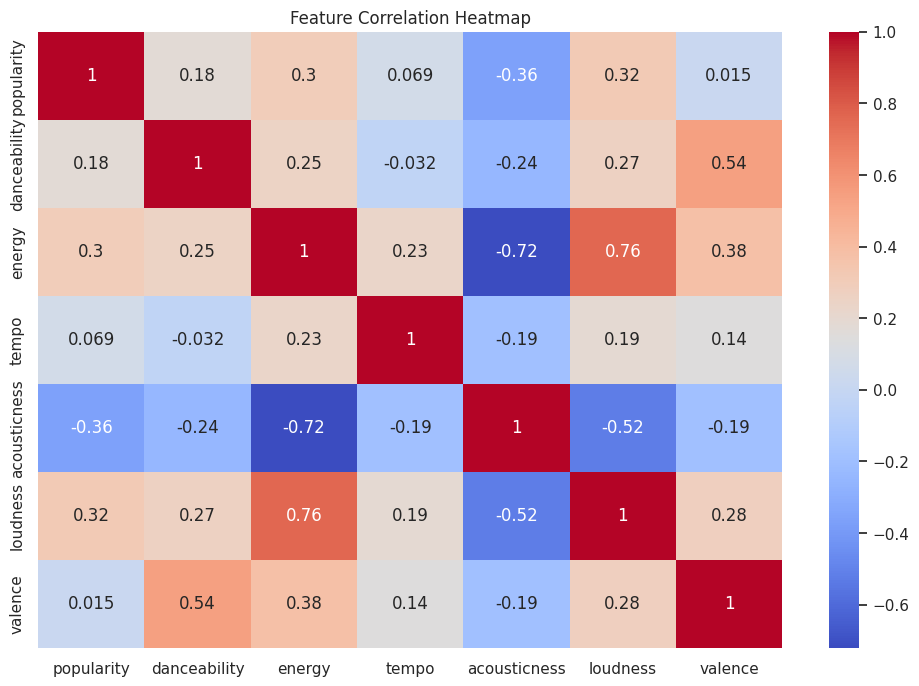

In [7]:
plt.figure(figsize=(12,8))
corr = tracks[['popularity','danceability','energy','tempo','acousticness','loudness','valence']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


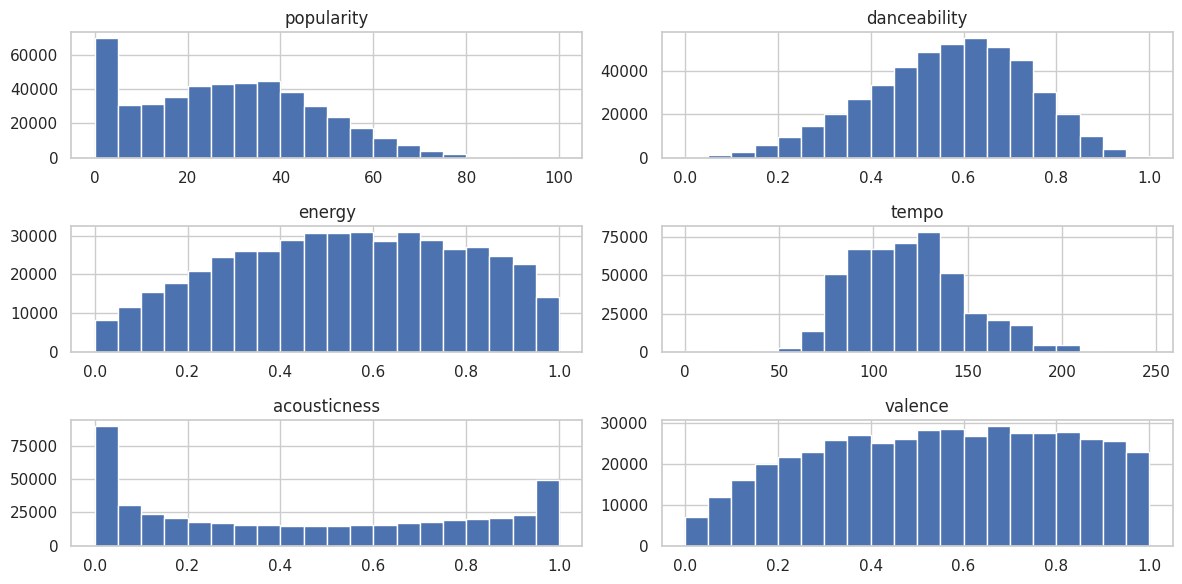

In [8]:
tracks[['popularity','danceability','energy','tempo','acousticness','valence']].hist(bins=20)
plt.tight_layout()
plt.show()


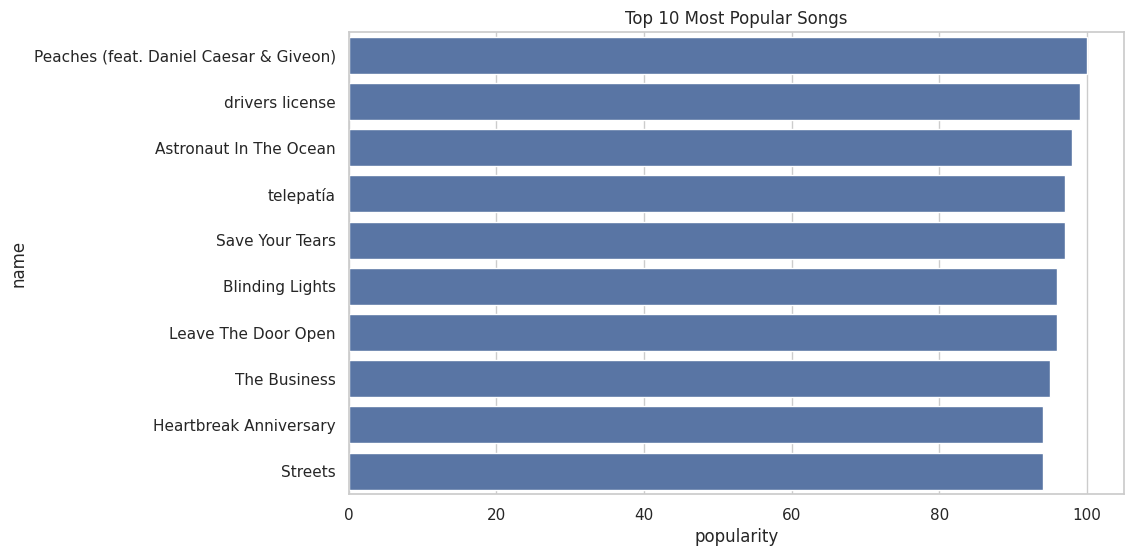

In [9]:
top_songs = tracks.sort_values(by='popularity', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x='popularity', y='name', data=top_songs)
plt.title("Top 10 Most Popular Songs")
plt.show()


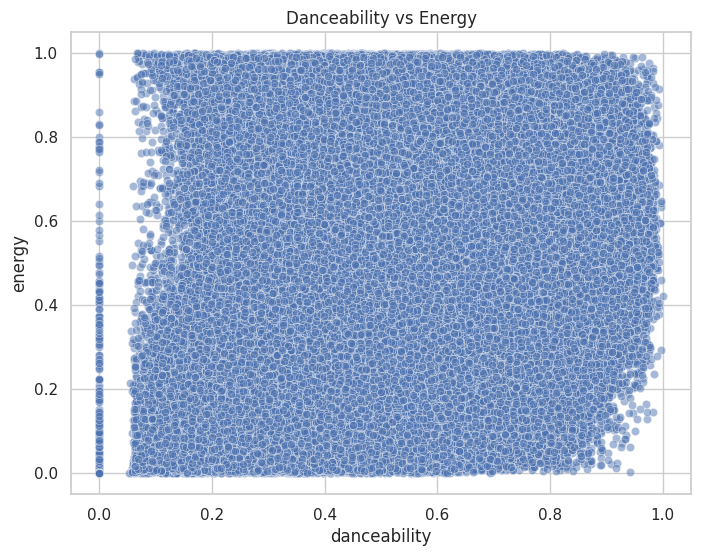

In [10]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=tracks, x='danceability', y='energy', alpha=0.5)
plt.title("Danceability vs Energy")
plt.show()


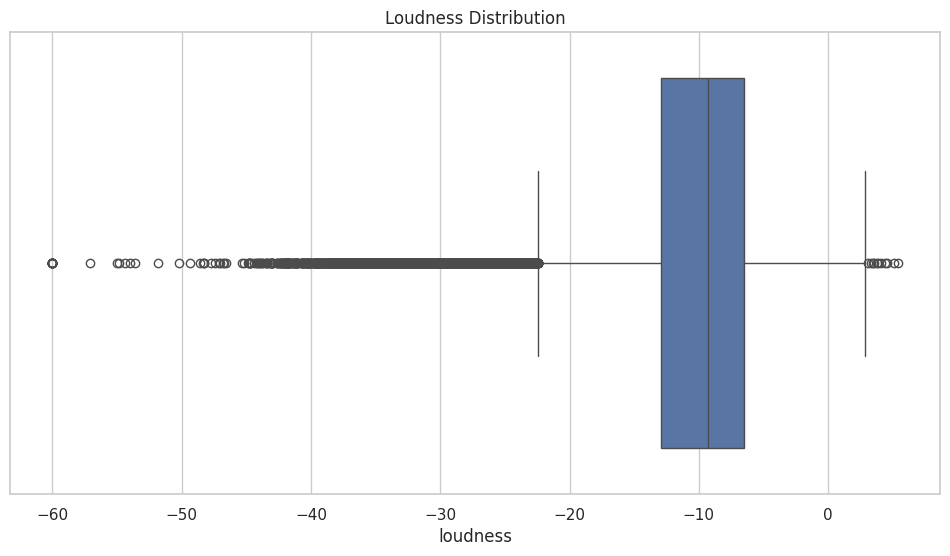

In [11]:
sns.boxplot(x=tracks['loudness'])
plt.title("Loudness Distribution")
plt.show()


MUSICAL TREND ANALYSIS

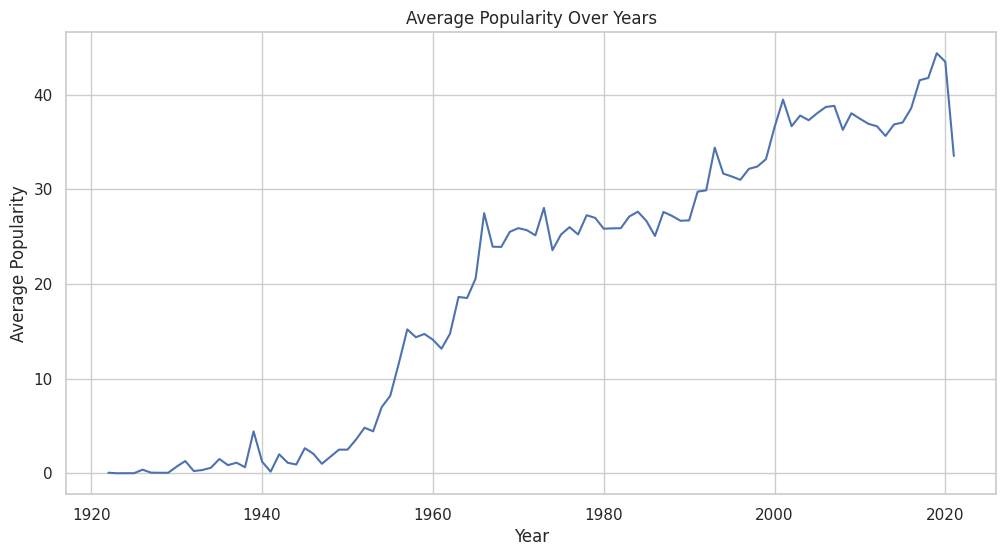

In [12]:
year_trend = tracks.groupby('release_year')['popularity'].mean().reset_index()

plt.plot(year_trend['release_year'], year_trend['popularity'])
plt.title("Average Popularity Over Years")
plt.xlabel("Year")
plt.ylabel("Average Popularity")
plt.show()


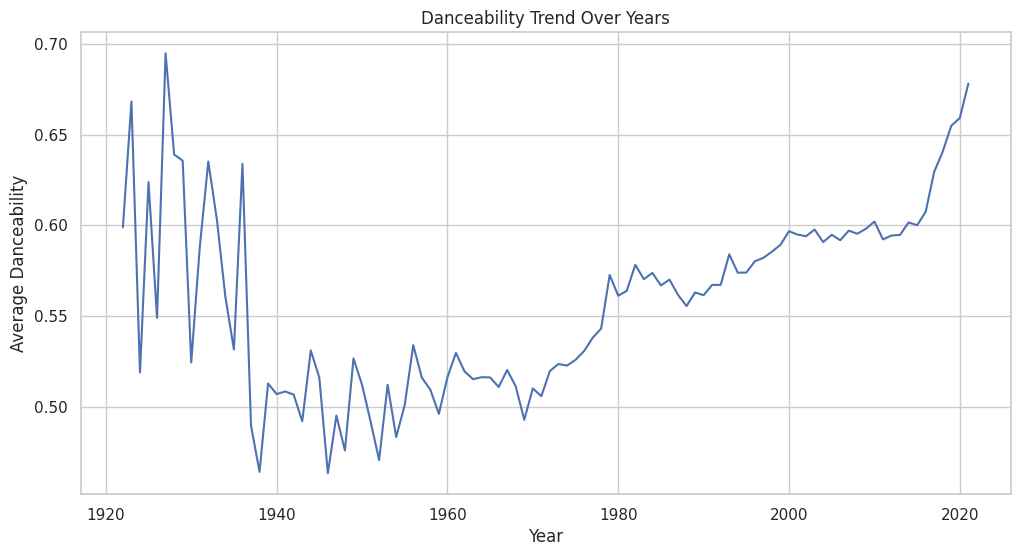

In [13]:
dance_trend = tracks.groupby('release_year')['danceability'].mean().reset_index()

plt.plot(dance_trend['release_year'], dance_trend['danceability'])
plt.title("Danceability Trend Over Years")
plt.xlabel("Year")
plt.ylabel("Average Danceability")
plt.show()


INTERACTIVE VISUALIZATIONS

In [14]:
fig = px.scatter(
    tracks.sample(2000),
    x="energy",
    y="popularity",
    color="popularity_category",
    hover_data=["name"],
    title="Interactive: Energy vs Popularity"
)

fig.show()


In [18]:
if 'track_genre' in tracks.columns:
    genre_pop = tracks.groupby('track_genre')['popularity'].mean().reset_index()
    genre_pop = genre_pop.sort_values(by='popularity', ascending=False).head(15)

    fig = px.bar(
        genre_pop,
        x='track_genre',
        y='popularity',
        title="Top 15 Genres by Popularity"
    )
    fig.show()


In [19]:
popular_songs = tracks[tracks['popularity'] > 70]

print("Average Feature Values of Highly Popular Songs:")
print(popular_songs[['danceability','energy','tempo','acousticness','valence']].mean())


Average Feature Values of Highly Popular Songs:
danceability      0.658456
energy            0.644950
tempo           121.719809
acousticness      0.242053
valence           0.520530
dtype: float64


In [20]:
# Create High Energy Party Playlist

party_playlist = tracks[
    (tracks['energy'] > 0.7) &
    (tracks['danceability'] > 0.7)
].sort_values(by='popularity', ascending=False)

party_playlist[['name','popularity','energy','danceability']].head(10)


,name,popularity,energy,danceability
93807,Friday (feat. Mufasa & Hypeman) - Dopamine Re-...,94,0.862,0.831483
93806,Fiel,94,0.701,0.856710
93812,Wellerman - Sea Shanty / 220 KID x Billen Ted ...,92,0.893,0.728557
93809,Up,92,0.795,0.875883
92826,positions,92,0.802,0.743693
92827,Hecha Pa' Mi,92,0.756,0.731584
92830,Dynamite,91,0.765,0.752775
92839,Head & Heart (feat. MNEK),91,0.874,0.740666
115733,Best Friend (feat. Doja Cat),90,0.766,0.847629
92843,Levitating (feat. DaBaby),90,0.825,0.708375
